# 결측치 처리
- 결측치 (Not Available-NA, NaN, None, Null)
    - 수집하지 못한 값. 모르는 값.
- 머신러닝 알고리즘은 데이터셋에 결측치가 있으면 학습이나 추론을 하지 못하기 때문에 적절한 처리가 필요하다.
    - 결측치 처리는 데이터 전처리 단계에서 진행한다.

- 결측치 처리방법
    1. 제거 (열단위, 행단위) 
        - 행단위를 기본으로 하는데 특정 열에 결측치가 너무 많을 경우 열을 제거한다.
    1. 다른 값으로 대체
        - 가장 가능성이 높은 값으로 대체
            - 수치형: 평균, 중앙값, 
            - 범주형: 최빈값(출연 빈도가 가장 많은 값)
            - 그 Feature의 결측치를 예측하는 머신러닝 알고리즘을 모델링해서 추론
        - 결측치 자체를 표현하는 값을 만들어서 대체 
            - 나이에 -1, 혈액형에 ? 같와 같이 그 Feature가 가질 수 없는 값으로 결측치를 표현하는 값을 정한 뒤 대체한다.

# 이상치(Outlier) 처리
- 의미 그대로 이상한 값, 튀는 값, 패턴을 벋어난 값으로 그 Feature를 가지는 대부분의 값들과는 동떨어진 값을 말한다.

- **오류값**
    - 잘못 수집 된 값.
    - 처리    
        - 결측치 처리한다.

- **극단치(분포에서 벋어난 값)**
    - 정상적이 값이지만 다른 값들과 다른 패턴을 가지는 값.
    - 일반적으로 극단적으로 크거나 작은 값
    - 처리
        1. 그 값을 그대로 유지한다.
        1. 결측치 처리를 한다.
        1. 다른 값으로 대체한다.
            - 보통 그 값이 가질 수 있는 Min/Max값을 설정한 뒤 그 값으로 변경한다.
    

# Feature 타입 별 전처리

## Feature(변수)의 타입
- **범주형(Categorical) 변수/이산형(Discrete) 변수**
    - 대상값들이 서로 떨어진 값을 가지는 변수. 대부분 몇 개의 범주 중 하나에 속하는 값들로 구성되어 어떤 분류에 대한 속성을 가진다.
    - **명목(Norminal) 변수/비서열(Unordered) 변수**
        - 범주에 속한 값간에 서열(순위)가 없는 변수
        - 성별, 혈액형
    - **순위(Ordinal) 변수/서열(Ordered) 변수**
        - 범주에 속한 값 간에 서열(순위)가 있는 변수
        - 성적, 직급
    

- **연속형(Continuous) 변수**
    -  대상값들이 서로 연속된 값을 가지는 변수를 말한다. 대상 값은 보통 정해진 범위 안의 모든 실수이다.
    - **등간(Interval) 변수**
        - 측정 대상의 순서와 측정 대상 간의 간격을 알 수 있는 변수로, 그 사이의 간격이 같은 변수를 말한다.
        - 0의 값이 특정의미로 사용되는 값으로 0이 절대적인 0의 값이 아닐 수 있다.
        - 예) 온도 : 온도에서 0은 절대적 0의 값이 아니라 얼음이 어는 빙결점의 온도를 의미한다. 
    - **비율(Ratio) 변수**
        - 측정 대상의 순서와 측정 대상 간의 간격을 알 수 있는 변수로, 그 사이의 간격이 같은 변수를 말한다. (등간변수와 동일)
        - 0이 절대적인 0의 값으로 사용된다.
        - 예) 나이, 무게, 거리, 소득

# 범주형 데이터 전처리
- Scikit-learn의 머신러닝 API들은 Feature나 Label의 값들이 숫자(정수/실수)인 것만 처리할 수 있다.
- 문자열(str)일 경우 숫자 형으로 변환해야 한다. 
    - **범주형 변수의 경우** 전처리를 통해 정수값으로 변환한다.
    - 범주형이 아닌 **단순 문자열인** 경우 일반적으로 제거한다.

## 범주형 Feature의 처리
- Label Encoding
- One-Hot Encoding 

## 레이블 인코딩(Label encoding)


- 문자열(범주형) 값을 오름차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
- **숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
- **숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

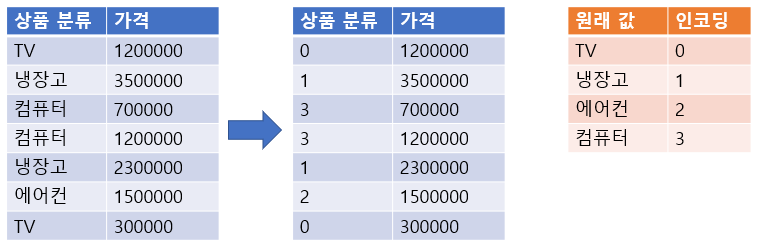

- **sklearn.preprocessing.LabelEncoder** 사용
    - fit(): 어떻게 변환할 지 학습
    - transform(): 문자열를 숫자로 변환
    - fit_transform(): 학습과 변환을 한번에 처리
    - inverse_transform():숫자를 문자열로 변환
    - classes_ : 인코딩한 클래스 조회

In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

items=['TV','냉장고','컴퓨터','컴퓨터','냉장고','에어컨','TV','TV']  #범주형 값들 (TV, 냉장고, 컴퓨터, 에어콘)

In [2]:
# 변환기(Transformer) 객체 생성 -> LabelEncoder()
encoder = LabelEncoder()
# 어떻게 변환할지 학습 - fit(학습할 대상)
encoder.fit(items)
# 변환 - transform(변환대상)
labels = encoder.transform(items)

In [4]:
print('인코딩 전 값', items)
print('인코딩 변환값:',labels)

인코딩 전 값 ['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어컨', 'TV', 'TV']
인코딩 변환값: [0 1 3 3 1 2 0 0]


In [5]:
print('인코딩 클래스:',encoder.classes_)
# ['TV' '냉장고' '에어컨' '컴퓨터']  - index가 encoding된 정수

인코딩 클래스: ['TV' '냉장고' '에어컨' '컴퓨터']


In [8]:
print('디코딩 원본 값:',encoder.inverse_transform([1, 0, 2, 0, 1, 1, 3, 3]))
print('디코딩', encoder.inverse_transform(labels))

디코딩 원본 값: ['냉장고' 'TV' '에어컨' 'TV' '냉장고' '냉장고' '컴퓨터' '컴퓨터']
디코딩 ['TV' '냉장고' '컴퓨터' '컴퓨터' '냉장고' '에어컨' 'TV' 'TV']


In [9]:
le2 = LabelEncoder()
# 학습할 대상과 변환할 대상이 같은 경우 - fit_transform()
item_labels = le2.fit_transform(items)
item_labels

array([0, 1, 3, 3, 1, 2, 0, 0], dtype=int64)

In [14]:
l2 = LabelEncoder()
# 변환할 대상 dataset에 모든 범주값들이 다 있지 않은 경우.
l2.fit(['TV', '냉장고','컴퓨터','에어컨', '노트북', '마우스', '모니터'])
print(l2.classes_)
l2.transform(items)

['TV' '냉장고' '노트북' '마우스' '모니터' '에어컨' '컴퓨터']


array([0, 1, 6, 6, 1, 5, 0, 0])

In [13]:
items

['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어컨', 'TV', 'TV']

In [16]:
# 변환할 대상 데이터셋이 2개 - 같은 범주값들을 가진다. ==> 하나의 데이터셋으로 학습시킨뒤 둘다 변환한다.
items1 = ['TV','냉장고','컴퓨터','컴퓨터','냉장고','에어컨','TV','TV']
items2 = ['TV',"TV",'냉장고']
le3 = LabelEncoder()
# items1로 학습 -> 변환
item_labels1 = le3.fit_transform(items1)
print(le3.classes_)
item_labels2 = le3.transform(items2)  # item1로 학습한 LabelEncoder를 이용해 변환만 한다.

print("item_labels1:", item_labels1)
print("item_labels2:", item_labels2)

['TV' '냉장고' '에어컨' '컴퓨터']
item_labels1: [0 1 3 3 1 2 0 0]
item_labels2: [0 0 1]


In [17]:
items3 = ['TV','핸드폰']  #학습할 때 없었던 class값이 있을 경우 Exception(KeyError) 발생
le3.transform(items3)

ValueError: y contains previously unseen labels: '핸드폰'

### adult data 에 label encoding 적용
- Adult 데이터셋은 1994년  인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋이다.
- target 은 income 이며 수입이 $50,000 이하인지 초과인지 두개의 class를 가진다.
- https://archive.ics.uci.edu/ml/datasets/adult

##### 데이터 로딩

In [27]:
import pandas as pd

cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
data  = pd.read_csv('data/adult.data', 
                    header=None,   # 첫줄부터 데이터
                    names=cols,    # 컬럼명 설정
                    na_values='?',   # 결측치로 사용된 문자열값 표시.
                    skipinitialspace=True) # 값이 공백으로 시작하면 그 공백을 제거  (abc, def, 가나다)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
# 결측치 확인
data.isnull().sum()  #컬럼별 결측치 개수

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [29]:
data.shape

(32561, 15)

##### 결측치 처리 => 제거

In [30]:
data.dropna(inplace=True)  #행단위 제거

In [31]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [32]:
data.shape

(30162, 15)

# TODO: encoding_columns 레이블 인코딩 처리


- 범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','native-country', 'income'
- 연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'

**아래 encoding_columns 컬럼들은 Label Encoding 처리,**  
**not_encoding_columns 컬럼들의 값들은 그대로 유지.**

변환 결과 DataFrame의 encoding_columns의 값들은 LabelEncoding 된 값으로, not_encoding_columns의 값들은 원래값 그대로 구성되도록 한다.

In [ ]:
encoding_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

In [38]:
pd.read_csv?

In [ ]:
pd.read_csv   #shift + tab

## Adult datast의 income 추론 모델링

### 데이터 분할
- X, y 나누기
- train/validation/test set 나누기

### 모델생성, 학습
- DecisionTreeClassifier
- train set/validation set 이용

### 검증
- 평가지표: 정확도(accuracy)
- validation set 이용

### 최종평가
- test set으로 최종평가

## 원핫 인코딩(One-Hot encoding)
- N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    - 고유값들을 피처(컬럼)로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
- **숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 사용한다.**
- **DecisionTree 계열의 알고리즘은 Feature에 0이 많은 경우(Sparse Matrix라고 한다.) 성능이 떨어지기 때문에 Label Encoding을 한다.**
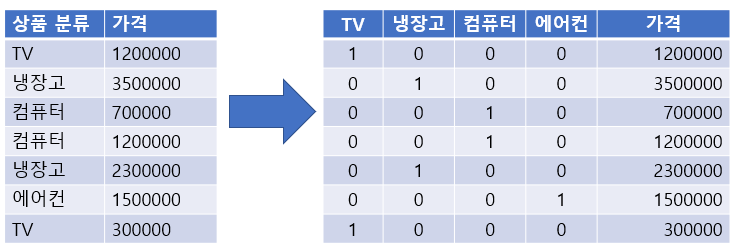

### One-Hot Encoding 변환 처리

- **Scikit-learn**
    - sklearn.preprocessing.OneHotEncoder 이용
        - fit(데이터셋): 데이터셋을 기준으로 어떻게 변환할 지 학습
        - transform(데이터셋): Argument로 받은 데이터셋을 원핫인코딩 처리
        - fit_transform(데이터셋): 학습과 변환을 한번에 처리
        - get_feature_names_out() : 원핫인코딩으로 변환된 컬럼의 이름을 반환
        - **데이터셋은 2차원 배열을 전달 하며 Feature별로 원핫인코딩 처리한다.**
            - DataFrame도 가능
            - 원핫인코딩 처리시 모든 타입의 값들을 다 변환한다. (연속형 값들도 변환) 그래서 변환려는 변수들만 모아서 처리해야 한다.

- **Pandas**
    - pandas.get_dummies(DataFrame [, columns=[변환할 컬럼명]]) 함수 이용
    - DataFrame에서 범주형(`object`, `category`) 변수만 변환한다.
    
> 범주형 변수의 값을 숫자 값을 가지는 경우가 있다. (ex: 별점)    
> 이런 경우 get_dummies() columns=['컬럼명','컬럼명'] 매개변수로 컬럼들을 명시한다.

##### scikit-learn 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

items=np.array(['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'])
np.unique(items)

In [ ]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(items[...,np.newaxis])
r = oh_encoder.transform(items[...,np.newaxis])
r
# print(r)
# print(r.toarray())

> sparse를 False로 주지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.     
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.   
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.

In [ ]:
oh_encoder.get_feature_names_out()

In [ ]:
pd.DataFrame(r.toarray(), columns=oh_encoder.get_feature_names_out())

In [ ]:
import pandas as pd
dic = {
    'Item':items, #범주형
    'Count':[10, 10, 20, 15, 13, 3, 12, 33], #연속형
    'Level':[1,1,1,2,3,3,1,1] #범주형
}
df = pd.DataFrame(dic)
df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(df)
r_ohe = ohe.transform(df)
print(ohe.get_feature_names_out())
r_ohe[:5,:]

In [ ]:
pd.DataFrame(r_ohe.astype(np.int32), columns=ohe.get_feature_names_out())

In [ ]:
ohe2 = OneHotEncoder(sparse=False)
ohe2.fit(df[['Item', 'Level']])
rv2 = ohe2.transform(df[['Item','Level']])
rv2

In [ ]:
ohe2.get_feature_names_out()

In [ ]:
result = np.concatenate([rv2, df['Count'].values[..., np.newaxis]], axis=1)
result

##### pandas의 get_dummies() 이용

In [ ]:
df

In [ ]:
pd.get_dummies(df)

In [ ]:
pd.get_dummies(df, columns=['Item', 'Level'])

# TODO: adult dataset에 one-hot encoding 적용
- 범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country', 'income'
- 연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'
- **위 Feature 중 'age', 'workclass','education', 'occupation', 'gender', 'hours-per-week' 만 사용한다.**
- 범주형 Feature중 **income은 출력 데이터이므로 Label Encoding 처리**를 한다.
- 나머지 범주형Feature들은 One-hot encoding 처리한다.

1. DataSet 읽기

1. 읽은 데이터셋이서 필요한 Feature만 추출해서 새로운 DataFrame생성

1. 결측치 처리 (제거)

1. One hot encoding

1. 모델링
    - Train/validation/Test set 분리
    - 모델 생성
    - 학습
    - 검증

##### 데이터 로딩

##### 필요한 Feature들만 추출

##### 결측치 제거 

##### income(출력데이터): LabelEncoding

##### 1. pandas get_dummies() 사용해 변환

##### 2. scikit-learn OneHotEncoder 사용

### 모델 학습

##### train, validation, test set 나누기

##### 모델생성
- DecisionTreeClassifier 사용

##### 추론, 검증

##### 평가

# 연속형(수치형) 데이터 전처리

- 연속형 데이터는 변수가 가지는 값들이 연속된 값인 경우로 보통 정해진 범위 안의 모든 실수가 값이 될 수 있다.


## Feature Scaling(정규화)
- 각 피처들간의 값의 범위(척도-Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
- 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 Feature간의 서로 다른 척도(Scale)에 영향을 받는다.
    - 선형모델, SVM 모델, 신경망 모델
- **Scaling(정규화)은 train set으로 fitting 한다. test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.**

### 종류
- 표준화(Standardization)
- Min Max Scaling

### 함수
- fit(): 어떻게 변환할 지 학습
- transform(): 변환
- fit_transform(): 학습과 변환을 한번에 처리 
- inverse_transform(): 변환된 값을 원래값으로 복원

##  표준화(StandardScaler)
- 피쳐의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환한다.
    - 0을 기준으로 모든 데이터들이 모여있게 된다

$$
New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
\mu-평균,\;  \sigma-표준편차
$$

- **sklearn.preprocessing.StandardScaler** 를 이용

##### 예제

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
data = np.array([10,2,30]).reshape(3,1)
print(data.shape)
print(data)

In [ ]:
print(f'평균: {np.mean(data)}, 표준편차: {np.std(data)}')

In [ ]:
stn_scaler = StandardScaler()
stn_scaler.fit(data)
result = stn_scaler.transform(data)
result

In [ ]:
print(f'평균: {np.mean(result)}, 표준편차: {np.std(result)}')

##### iris 변환 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 표준편차 값')
print(iris_df.std())


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)


iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 표준편차 값')
print(iris_df_scaled.std())

## MinMaxScaler
- 데이터셋의 모든 값을 0(Min value)과 1(Max value) 사이의 값으로 변환한다.
$$
New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
$$

##### 예제

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(f'최소값: {np.min(data)}, 최대값: {np.max(data)}')

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(data)
result = mm_scaler.transform(data)

In [ ]:
print(f'최소값: {np.min(result)}, 최대값: {np.max(result)}')

In [ ]:
print(data)

In [ ]:
print(result)

##### iris 데이터셋 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


### 위스콘신 유방암 데이터셋
- 위스콘신 대학교에서 제공한 유방암 진단결과 데이터
- Feature: 종양 측정값들
    - 모든 Feature들은 연속형(continous)이다.
- target: 악성, 양성 여부
- scikit-learn에서 toy dataset으로 제공한다. 
    - load_breast_cancer() 함수 이용

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
data.keys()

In [ ]:
data.target_names

In [ ]:
data.feature_names

# TODO
- StandardScaler와 MinMax Scaler를 이용해 Feature Scaling 위스콘신 유방암 데이터셋의 Feature들을 처리를 한다.
    - Scaler 학습은 Train set으로 만 하고 그 학습된 것을 이용해 Train/Validation/Test set을 변환한다.
- StandardScaler 로 변환한 결과를 저장할 변수
    - X_train_scaled1, X_val_scaled1, X_test_scaled1
- MinMaxScaler 로 변환한 결과를 저장할 변수
    - X_train_scaled2, X_val_scaled2, X_test_scaled2

##### 데이터 나누기
train/validation/test set으로 나눈다.

#### scaling 처리
##### 표준화 (Standard Scaling)

##### 확인
- 평균, 표준편처 확인

##### MinMax Scaling

##### 확인
- min, max값 확인

### Modeling

##### scaling하지 않은 데이터셋 이용

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# scaling 하지 않은 X_train으로 학습 및 평가
# 모델 생성
svc = SVC(C=0.1, gamma=0.1, random_state=0) #C, gamma 성능과 관련된 파라미터(하이퍼 파라미터-hyper parameter)

# 학습
svc.fit(X_train, y_train)
# 평가
pred_train = svc.predict(X_train)
pred_val = svc.predict(X_val)
pred_test = svc.predict(X_test)

print(accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val), accuracy_score(y_test, pred_test))

##### Standard Scaling 데이터셋 이용

In [ ]:
# scaling 된 X_train_scaled 로 학습 및 평가
# StandardScaler로 전처리된 데이터셋
svc = SVC(C=0.1, gamma=0.1, random_state=0)
#학습
svc.fit(X_train_scaled1, y_train)
#평가
# 추론 -> 학습데이터셋(Train dataset)에 처리한 전처리를 똑같이 적용한 뒤 추론해야 한다. 
pred_train1 = svc.predict(X_train_scaled1)
pred_val1 = svc.predict(X_val_scaled1)
pred_test1 = svc.predict(X_test_scaled1)

print(accuracy_score(y_train, pred_train1), accuracy_score(y_val, pred_val1), accuracy_score(y_test, pred_test1))

##### MinMax Scaling 데이터셋 이용

In [ ]:
# scaling 된 X_train_scaled 로 학습 및 평가
# StandardScaler로 전처리된 데이터셋
svc = SVC(C=0.1, gamma=0.1, random_state=0)
#학습
svc.fit(X_train_scaled2, y_train)
#평가
# 추론 -> 학습데이터셋(Train dataset)에 처리한 전처리를 똑같이 적용한 뒤 추론해야 한다. 
pred_train2 = svc.predict(X_train_scaled2)
pred_val2 = svc.predict(X_val_scaled2)
pred_test2 = svc.predict(X_test_scaled2)

print(accuracy_score(y_train, pred_train2), accuracy_score(y_val, pred_val2), accuracy_score(y_test, pred_test2))